# Assignment 3: Decision Tree and Random Forest {-}

This assignment aims at familiarizing you with training and testing Decision Tree and Random Forest classification model. Here are the BASIC requirements of the assignment:

- Load the data.
- Analyze the data.
- Check if the data is imbalanced, possibly apply SMOTE to oversample or undersample data classes.
- Use GridSearchCV to find the best Decision Tree and Random Forest.
- Show the most important features.
- Visualize the tree.


The dataset you will be working on is 'data-employee-recruitment.csv'. It is composed of attributes such as employee gender, education level, company size, etc., to develop an employee recruitment prediction model.

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment3-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named ML4DS-\<StudentID>-Assignment3 (e.g., ML4DS-2012345-Assigment3) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how you accomplish the assignment requirements. It is a plus if you have data exploration and modeling steps other than the basic requirements. In addition, your code should conform to a Python coding convention such as PEP-8.

### Deadline {-}
Please visit Canvas for details.

In [1]:
# Load the library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv("data-employee-recruitment.csv")

In [3]:
# Show several data samples
df.head()

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,14569,0.704,Male,Has relevent experience,Full time course,Graduate,STEM,2,50-99,Pvt Ltd,2,71,1.0
1,10557,0.594,Female,Has relevent experience,Full time course,Masters,STEM,9,50-99,Early Stage Startup,never,217,1.0
2,14095,0.596,Male,Has relevent experience,Part time course,Graduate,Humanities,2,100-500,Pvt Ltd,2,12,1.0
3,16300,0.614,Male,Has relevent experience,Full time course,Masters,STEM,4,50-99,Pvt Ltd,1,20,1.0
4,14550,0.534,Male,No relevent experience,Full time course,Graduate,STEM,<1,50-99,Early Stage Startup,1,52,1.0


A company is looking for potential candidates from a pool of training program attendants. The dataset contains attendant background (demographics, current company, i.e., data features) and whether he or she is looing for a job change (data label). The company wants to build a prediction model using this dataset. Here follows the data dictionary:

* enrollee_id : unique ID for candidate
* city_development_index : developement index of the city (scaled)
* gender: gender of candidate
* relevent_experience: relevant experience of candidate
* enrolled_university: type of university course enrolled if any
* education_level: education level of candidate
* major_discipline: education major discipline of candidate
* experience: candidate's total experience in years
* company_size: number of employees in the current company of candidate
* company_type : Type of current employer
* last_new_job: difference in years between previous job and current job
* training_hours: training hours completed
* target value: 0 – not looking for job change, 1 – looking for a job change

In [4]:
# Shape of data frame
print("Data shape: " + str(df.shape) + "\n")     

Data shape: (2135, 13)



In [5]:
# Create a copy of the data frame
data = df.copy()

In [6]:
# Drop the enrollee_id column
data.drop(columns=['enrollee_id'], inplace=True)
data

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.704,Male,Has relevent experience,Full time course,Graduate,STEM,2,50-99,Pvt Ltd,2,71,1.0
1,0.594,Female,Has relevent experience,Full time course,Masters,STEM,9,50-99,Early Stage Startup,never,217,1.0
2,0.596,Male,Has relevent experience,Part time course,Graduate,Humanities,2,100-500,Pvt Ltd,2,12,1.0
3,0.614,Male,Has relevent experience,Full time course,Masters,STEM,4,50-99,Pvt Ltd,1,20,1.0
4,0.534,Male,No relevent experience,Full time course,Graduate,STEM,<1,50-99,Early Stage Startup,1,52,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2130,0.698,Female,No relevent experience,Part time course,Graduate,Other,3,10/49,Funded Startup,1,14,0.0
2131,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,10000+,NGO,1,94,0.0
2132,0.926,Male,Has relevent experience,Full time course,Masters,STEM,19,50-99,Pvt Ltd,4,27,0.0
2133,0.895,Male,Has relevent experience,Part time course,Masters,Other,>20,1000-4999,Pvt Ltd,>4,18,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  2135 non-null   float64
 1   gender                  2135 non-null   object 
 2   relevent_experience     2135 non-null   object 
 3   enrolled_university     2135 non-null   object 
 4   education_level         2135 non-null   object 
 5   major_discipline        2135 non-null   object 
 6   experience              2135 non-null   object 
 7   company_size            2135 non-null   object 
 8   company_type            2135 non-null   object 
 9   last_new_job            2135 non-null   object 
 10  training_hours          2135 non-null   int64  
 11  target                  2135 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 200.3+ KB


In [8]:
# Check for the missing values
df.isnull().values.any()

False

In [9]:
# Check for the duplicated values
df.duplicated().sum()

0

In [10]:
# Get the values of each categorical feature
cat_cols = [col for col in data.columns if data[col].dtypes == "O"]
for col in cat_cols:
    print(col + ":", data[col].unique())

gender: ['Male' 'Female']
relevent_experience: ['Has relevent experience' 'No relevent experience']
enrolled_university: ['Full time course' 'Part time course']
education_level: ['Graduate' 'Masters' 'Phd']
major_discipline: ['STEM' 'Humanities' 'Other' 'No Major' 'Business Degree' 'Arts']
experience: ['2' '9' '4' '<1' '5' '3' '11' '10' '7' '12' '1' '16' '15' '8' '13' '17'
 '>20' '6' '19' '14' '18' '20']
company_size: ['50-99' '100-500' '<10' '10000+' '1000-4999' '10/49' '500-999'
 '5000-9999']
company_type: ['Pvt Ltd' 'Early Stage Startup' 'Funded Startup' 'NGO' 'Public Sector'
 'Other']
last_new_job: ['2' 'never' '1' '4' '3' '>4']


In [11]:
sns.set()

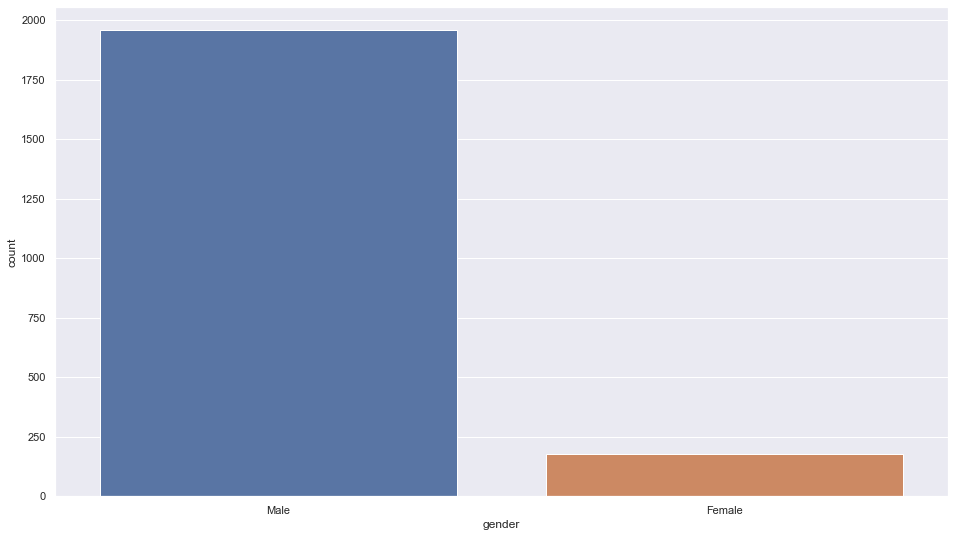

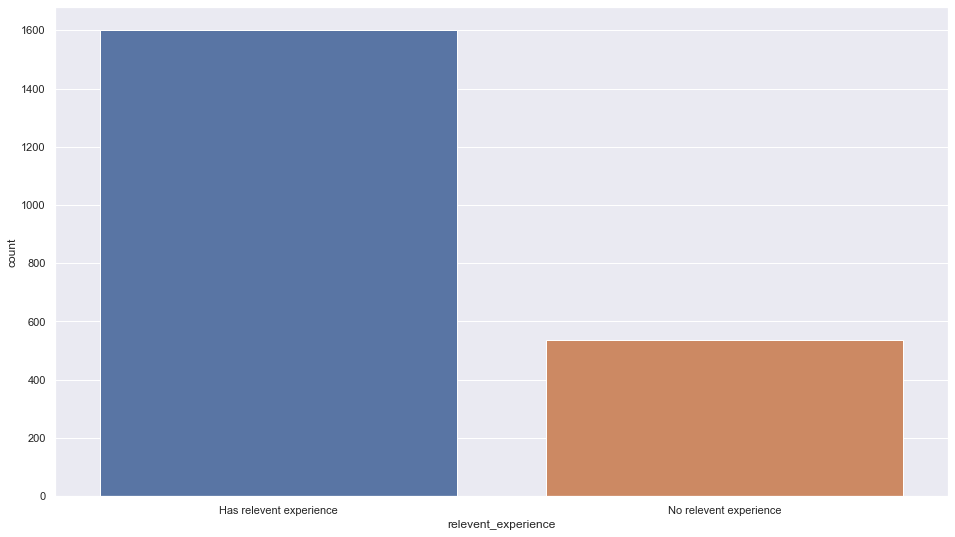

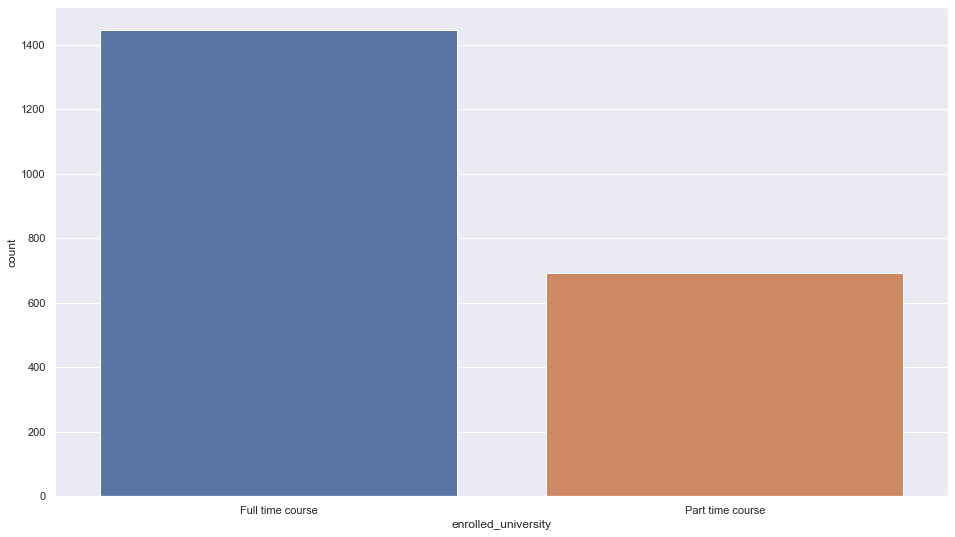

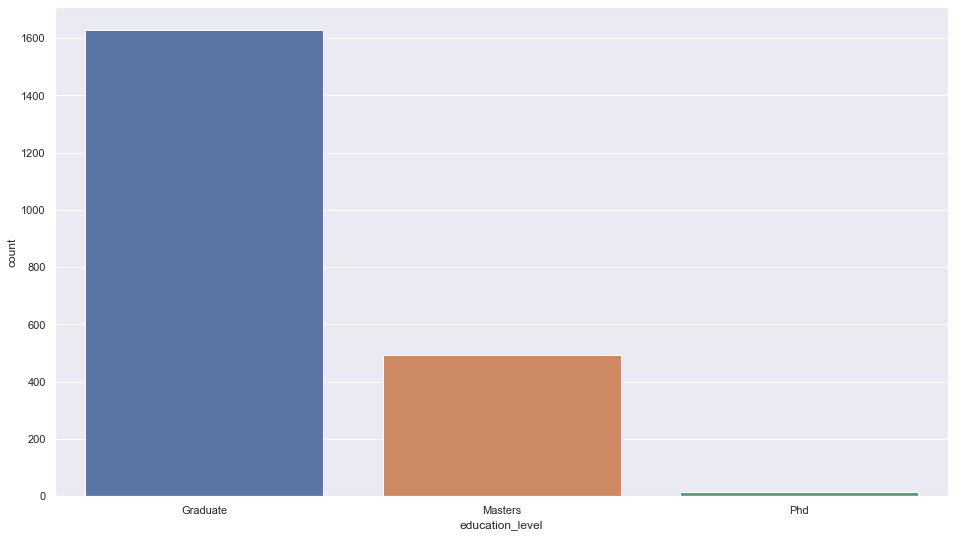

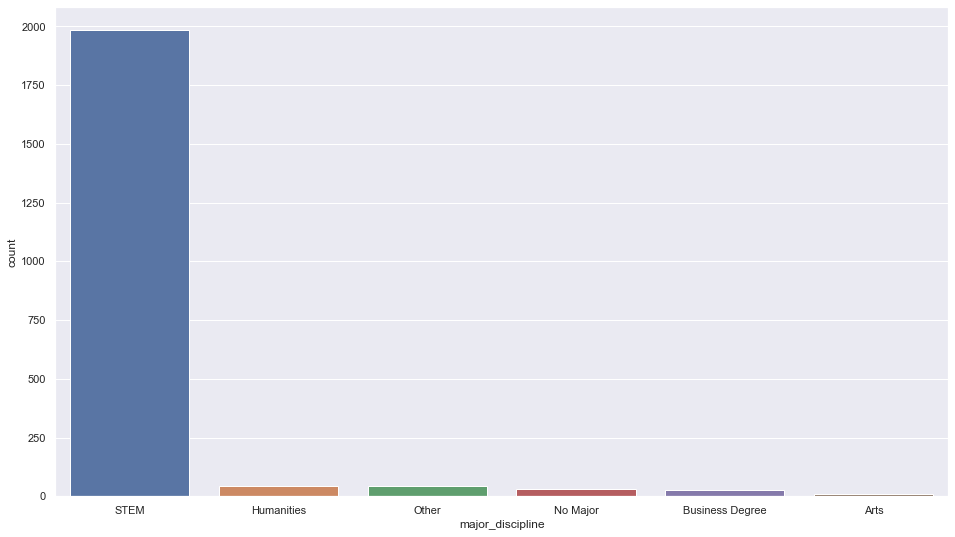

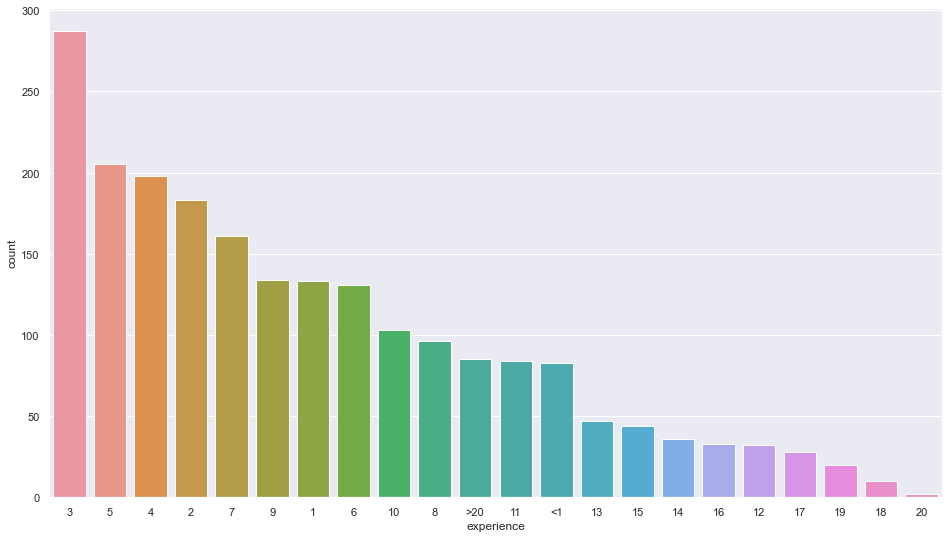

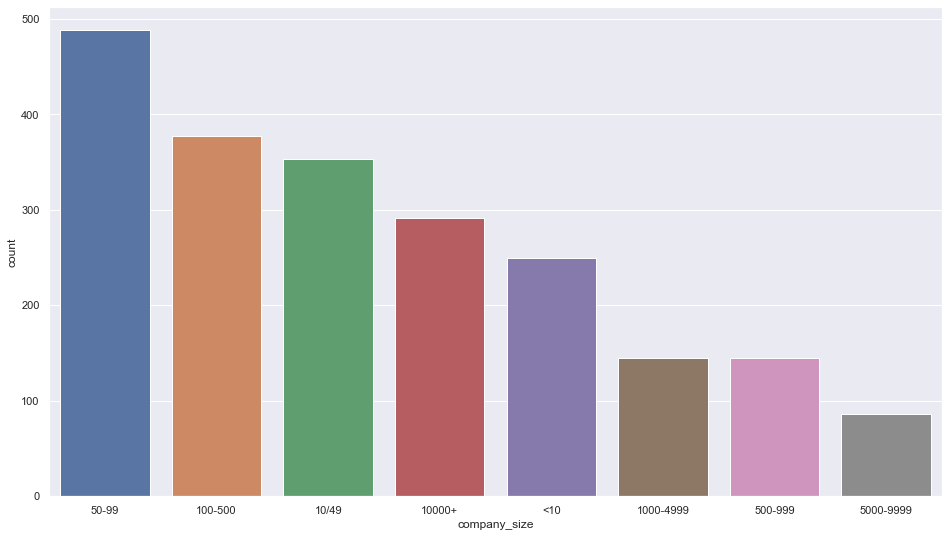

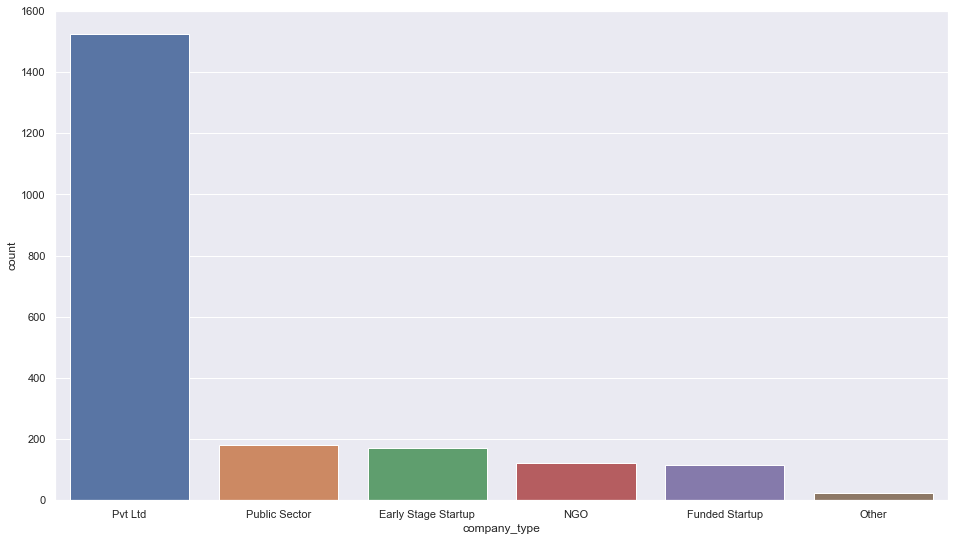

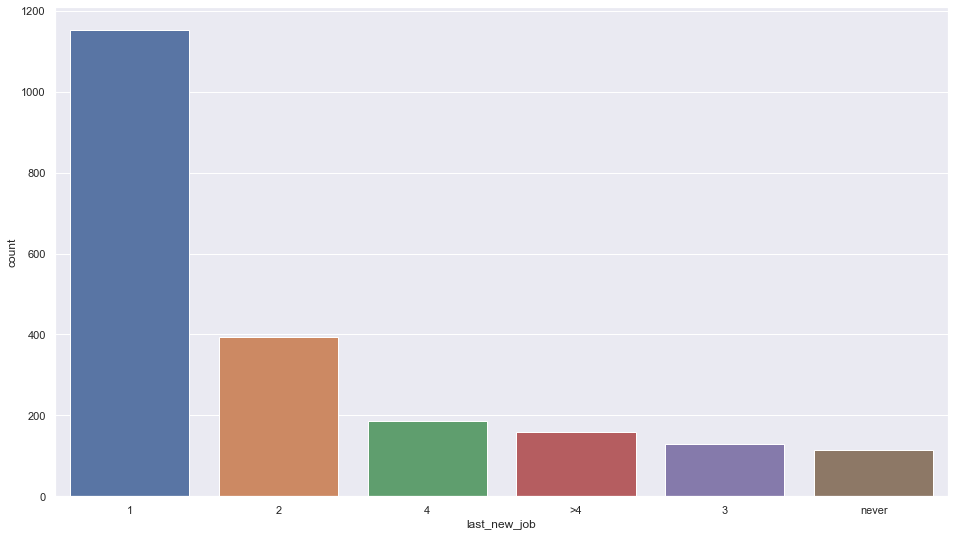

In [12]:
# Visualize the number of data samples in each categorical feature
for col in cat_cols:
    plt.figure(figsize=(16,9))
    sns.countplot(x=col, data = df, order=df[col].value_counts().index)
    plt.show()

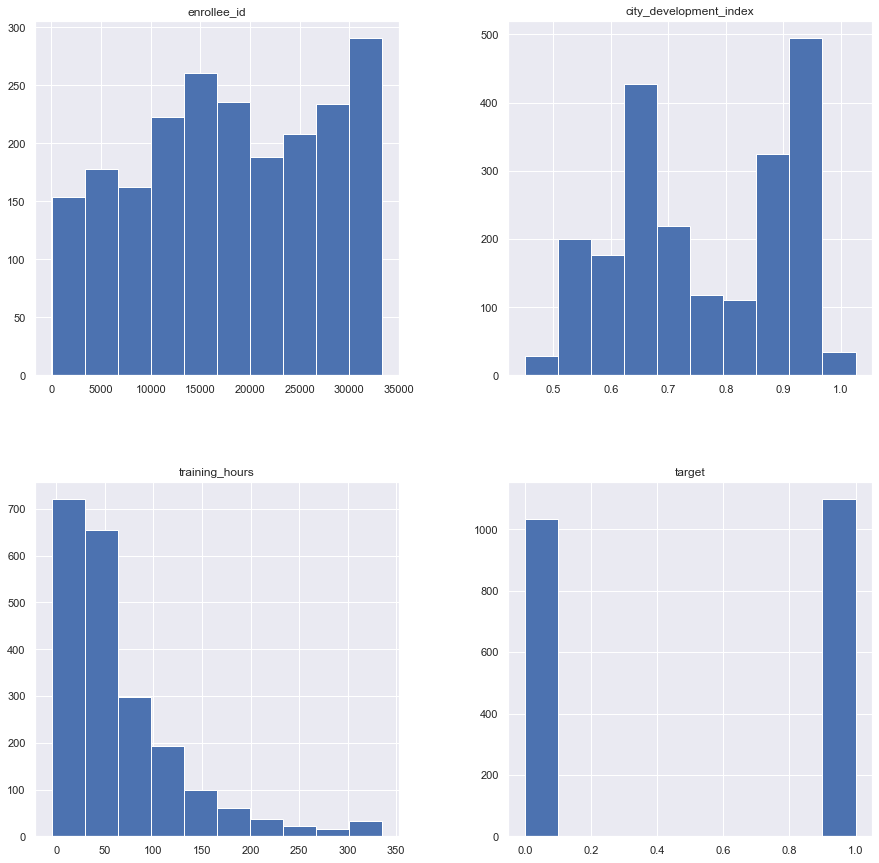

In [13]:
df.hist(figsize=(15,15))
plt.show()

This dataset is balanced so there is no need to use SMOTE

In [14]:
# Transform the experience and last_new_job to numerical features
data.replace(['<1', 'never'], 0, inplace = True)
data.replace('>20', 21, inplace = True)
data.replace('>4', 5, inplace = True)

data['experience'] = data['experience'].astype(int)
data['last_new_job'] = data['last_new_job'].astype(int)

In [15]:
# Transform the company_size and education_level to numerical features
data['company_size'] = data['company_size'].map({'<10': 0, '10/49': 1, '50-99': 2, '100-500': 3, '500-999': 4, '1000-4999': 5, '5000-9999': 6, '10000+': 7})
data['education_level'] = data['education_level'].map({'Graduate': 0, 'Masters': 1, 'Phd': 2})

In [16]:
# Transform the rest categorical features to numerical by One-Hot Encoding
data = pd.get_dummies(data)

In [17]:
data.drop(columns=['gender_Male', 'relevent_experience_No relevent experience', 'enrolled_university_Part time course'], inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   city_development_index                       2135 non-null   float64
 1   education_level                              2135 non-null   int64  
 2   experience                                   2135 non-null   int32  
 3   company_size                                 2135 non-null   int64  
 4   last_new_job                                 2135 non-null   int32  
 5   training_hours                               2135 non-null   int64  
 6   target                                       2135 non-null   float64
 7   gender_Female                                2135 non-null   uint8  
 8   relevent_experience_Has relevent experience  2135 non-null   uint8  
 9   enrolled_university_Full time course         2135 non-null   uint8  
 10  

In [19]:
data

,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,gender_Female,relevent_experience_Has relevent experience,enrolled_university_Full time course,...,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.704,0,2,2,2,71,1.0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
1,0.594,1,9,2,0,217,1.0,1,1,1,...,0,0,0,1,1,0,0,0,0,0
2,0.596,0,2,3,2,12,1.0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,0.614,1,4,2,1,20,1.0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
4,0.534,0,0,2,1,52,1.0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,0.698,0,3,1,1,14,0.0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2131,0.920,0,3,7,1,94,0.0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
2132,0.926,1,19,2,4,27,0.0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
2133,0.895,1,21,5,5,18,0.0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [20]:
data = data.rename(columns= {'gender_Female': 'gender', 'relevent_experience_Has relevent experience': 'relevent_experience', 'enrolled_university_Full time course': 'enrolled_university'})

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   city_development_index            2135 non-null   float64
 1   education_level                   2135 non-null   int64  
 2   experience                        2135 non-null   int32  
 3   company_size                      2135 non-null   int64  
 4   last_new_job                      2135 non-null   int32  
 5   training_hours                    2135 non-null   int64  
 6   target                            2135 non-null   float64
 7   gender                            2135 non-null   uint8  
 8   relevent_experience               2135 non-null   uint8  
 9   enrolled_university               2135 non-null   uint8  
 10  major_discipline_Arts             2135 non-null   uint8  
 11  major_discipline_Business Degree  2135 non-null   uint8  
 12  major_

In [22]:
data

,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,gender,relevent_experience,enrolled_university,...,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.704,0,2,2,2,71,1.0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
1,0.594,1,9,2,0,217,1.0,1,1,1,...,0,0,0,1,1,0,0,0,0,0
2,0.596,0,2,3,2,12,1.0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,0.614,1,4,2,1,20,1.0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
4,0.534,0,0,2,1,52,1.0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,0.698,0,3,1,1,14,0.0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2131,0.920,0,3,7,1,94,0.0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
2132,0.926,1,19,2,4,27,0.0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
2133,0.895,1,21,5,5,18,0.0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


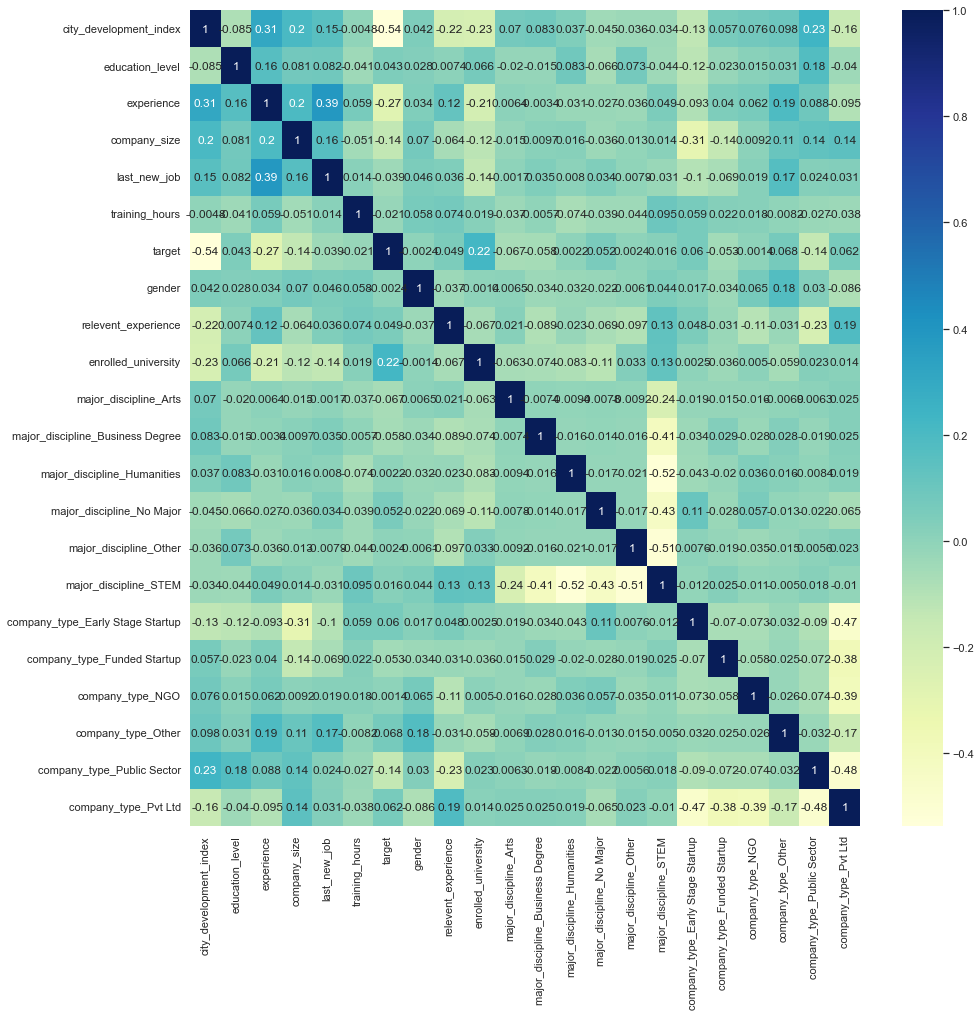

In [23]:
# Drawing the heatmap to check the correlations between variables
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

### Decision Tree

In [24]:
# Drop the column 'target' because it is the data label
X = data.drop(columns=['target'])

# Assign data label to to variable 'y'
y = data.target

In [25]:
# Load libraries
from sklearn.model_selection import train_test_split, GridSearchCV

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state=1, test_size=0.2)

In [26]:
# Import GridSearchCV for finding the best hyper-parameter set.
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

params = {"criterion": ["gini", "entropy"],             # Criterion to evaluate the purity.
         "max_depth": [4, 5, 6, 7, 8, 9, 10],                           # Maximum depth of the tree
         "min_samples_split": [2, 3, 4, 5, 6, 7, 8],
          "min_samples_leaf": [2, 3, 4, 5, 6, 7, 8],
          "max_leaf_nodes": [8,9,10,11,12,13,14,15,16]}                   # Stop splitting condition.

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, cv=5)

In [27]:
# Run the search on training data samples.
tree_cv = grid_search.fit(X_train, y_train)

In [28]:
# Show the results of each hyperparameter with 5-fold cross validation
result = pd.DataFrame(tree_cv.cv_results_)
result = result.set_index('params')
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
params,,,,,,,,,,,,,,,,,
"{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}",0.006398,0.004278,0.000799,0.000747,gini,4,8,2,2,0.847953,0.821637,0.815789,0.785924,0.853372,0.824935,0.02431,5735
"{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 8, 'min_samples_leaf': 2, 'min_samples_split': 3}",0.010014,0.008193,0.000000,0.000000,gini,4,8,2,3,0.847953,0.821637,0.815789,0.785924,0.853372,0.824935,0.02431,5735
"{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 8, 'min_samples_leaf': 2, 'min_samples_split': 4}",0.006831,0.007592,0.000200,0.000400,gini,4,8,2,4,0.847953,0.821637,0.815789,0.785924,0.853372,0.824935,0.02431,5735
"{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 8, 'min_samples_leaf': 2, 'min_samples_split': 5}",0.008366,0.006400,0.000485,0.000610,gini,4,8,2,5,0.847953,0.821637,0.815789,0.785924,0.853372,0.824935,0.02431,5735
"{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 8, 'min_samples_leaf': 2, 'min_samples_split': 6}",0.005240,0.002422,0.001475,0.001978,gini,4,8,2,6,0.847953,0.821637,0.815789,0.785924,0.853372,0.824935,0.02431,5735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 16, 'min_samples_leaf': 8, 'min_samples_split': 4}",0.008518,0.008405,0.003129,0.006258,entropy,10,16,8,4,0.842105,0.862573,0.824561,0.809384,0.850440,0.837813,0.01884,1044
"{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 16, 'min_samples_leaf': 8, 'min_samples_split': 5}",0.015621,0.000003,0.000000,0.000000,entropy,10,16,8,5,0.842105,0.862573,0.824561,0.809384,0.850440,0.837813,0.01884,1044
"{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 16, 'min_samples_leaf': 8, 'min_samples_split': 6}",0.006248,0.007653,0.003124,0.006249,entropy,10,16,8,6,0.842105,0.862573,0.824561,0.809384,0.850440,0.837813,0.01884,1044


In [29]:
# Ranking the score of each hyperparameter var_smoothing to choose the best one
result[['mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'])

,mean_test_score,rank_test_score
params,,
"{'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 16, 'min_samples_leaf': 3, 'min_samples_split': 8}",0.848349,1
"{'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 16, 'min_samples_leaf': 3, 'min_samples_split': 4}",0.848349,1
"{'criterion': 'gini', 'max_depth': 8, 'max_leaf_nodes': 16, 'min_samples_leaf': 8, 'min_samples_split': 8}",0.847185,3
"{'criterion': 'gini', 'max_depth': 8, 'max_leaf_nodes': 16, 'min_samples_leaf': 8, 'min_samples_split': 7}",0.847185,3
"{'criterion': 'gini', 'max_depth': 8, 'max_leaf_nodes': 16, 'min_samples_leaf': 8, 'min_samples_split': 6}",0.847185,3
...,...,...
"{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 15, 'min_samples_leaf': 4, 'min_samples_split': 8}",0.817906,6154
"{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 15, 'min_samples_leaf': 4, 'min_samples_split': 7}",0.817906,6154
"{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 15, 'min_samples_leaf': 4, 'min_samples_split': 6}",0.817906,6154


In [30]:
# Best set of hyper-parameters found after searching
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_leaf_nodes': 16,
 'min_samples_leaf': 3,
 'min_samples_split': 4}

In [31]:
# Build a decision tree model pipeline from the best set of hyper-parameters found
model_dt = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'], max_depth=grid_search.best_params_['max_depth'], min_samples_leaf = grid_search.best_params_['min_samples_leaf'], max_leaf_nodes = grid_search.best_params_['max_leaf_nodes'], min_samples_split= grid_search.best_params_['min_samples_split'])

In [32]:
# Train the decision tree model
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=16, min_samples_leaf=3,
                       min_samples_split=4)

In [33]:
# Calculate some evaluation metrics: precision, recall, f1-score. 'Support' is the number of actual occurrences of the class in the dataset.
from sklearn.metrics import classification_report

# Make prediction on the original test set (after training on the over-sampled training set).
pred_y = model_dt.predict(X_test)

print(classification_report(y_test, pred_y))

# Note 1: macro avg = (precision_0 + precision_1) / 2
# Note 2: weighted avg = (support_0 * precision_0 + support_1 * precision_1) / number_of_samples

              precision    recall  f1-score   support

         0.0       0.84      0.73      0.78       199
         1.0       0.79      0.88      0.83       228

    accuracy                           0.81       427
   macro avg       0.81      0.80      0.80       427
weighted avg       0.81      0.81      0.81       427



### Random Forest

In [34]:
# Building a RandomForest is similar to building a decision tree, but there is an additional hyper-parameter called n_estimators which is the number of trees in the forest.
from sklearn.ensemble import RandomForestClassifier

params = {"criterion": ["gini", "entropy"],             # Criterion to evaluate the purity.
         "max_depth": [7, 9, 11],                           # Maximum depth of the tree
         "min_samples_split": [8, 12, 16]}                   # Stop splitting condition.

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(n_estimators=10, n_jobs=10), param_grid=params, cv= 5) # Number of trees in the forest is 10

# Run the search on training data samples.
forest_cv = grid_search_rf.fit(X_train, y_train)     # Train the RandomForest

In [35]:
# Show the results of each hyperparameter with 5-fold cross validation
result = pd.DataFrame(forest_cv.cv_results_)
result = result.set_index('params')

# Ranking the score of each hyperparameter var_smoothing to choose the best one
result[['mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'])

,mean_test_score,rank_test_score
params,,
"{'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 12}",0.858306,1
"{'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 12}",0.854792,2
"{'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 8}",0.854211,3
"{'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 8}",0.850121,4
"{'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 12}",0.849529,5
"{'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 16}",0.848941,6
"{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 8}",0.847773,7
"{'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 8}",0.846595,8
"{'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 16}",0.843673,9


In [36]:
# Best set of hyper parameters of the Random Forest
grid_search_rf.best_params_

{'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 12}

In [37]:
# Build a Random Forest model pipeline from the best set of hyper-parameters found
model_rf = RandomForestClassifier(n_estimators=100, random_state=1, criterion=grid_search_rf.best_params_['criterion'], max_depth=grid_search_rf.best_params_['max_depth'], min_samples_split=grid_search_rf.best_params_['min_samples_split'])     # Initialize the RandomForest

In [38]:
# Train the Random Forest model
model_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_split=12,
                       random_state=1)

In [39]:
# Calculate some evaluation metrics: precision, recall, f1-score. 'Support' is the number of actual occurrences of the class in the dataset.
from sklearn.metrics import classification_report

# Make prediction on the original test set (after training on the over-sampled training set).
pred_y = model_rf.predict(X_test)

print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85       199
         1.0       0.88      0.87      0.87       228

    accuracy                           0.86       427
   macro avg       0.86      0.86      0.86       427
weighted avg       0.86      0.86      0.86       427



## Feature Importance

### Gini

In [40]:
# Print the importance level of each feature using gini
weights = model_dt.feature_importances_     # Feature importance scores.
cols = X.columns                            # Corresponding names of important features.
feature_importances = pd.Series(weights, index=cols)     # Generate Series containing importance level
print(feature_importances)

city_development_index              0.864943
education_level                     0.000000
experience                          0.052404
company_size                        0.018229
last_new_job                        0.043088
training_hours                      0.000000
gender                              0.000000
relevent_experience                 0.000000
enrolled_university                 0.000000
major_discipline_Arts               0.000000
major_discipline_Business Degree    0.000000
major_discipline_Humanities         0.000000
major_discipline_No Major           0.000000
major_discipline_Other              0.000000
major_discipline_STEM               0.000000
company_type_Early Stage Startup    0.000000
company_type_Funded Startup         0.000000
company_type_NGO                    0.000000
company_type_Other                  0.021336
company_type_Public Sector          0.000000
company_type_Pvt Ltd                0.000000
dtype: float64


In [41]:
# Five most important features 
feature_importances.nlargest(5)

city_development_index    0.864943
experience                0.052404
last_new_job              0.043088
company_type_Other        0.021336
company_size              0.018229
dtype: float64

### Entropy

In [42]:
# Build a classification tree based on Entropy
model_dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=grid_search.best_params_['max_depth'], min_samples_leaf = grid_search.best_params_['min_samples_leaf'], max_leaf_nodes = grid_search.best_params_['max_leaf_nodes'], min_samples_split= grid_search.best_params_['min_samples_split'])
model_dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=16,
                       min_samples_leaf=3, min_samples_split=4)

In [43]:
# Print the importance level of each feature using Entropy
weights = model_dt_entropy.feature_importances_     # Feature importance scores.
cols = X.columns                            # Corresponding names of important features.
feature_importances_entropy = pd.Series(weights, index=cols)     # Generate Series containing importance level
print(feature_importances)

city_development_index              0.864943
education_level                     0.000000
experience                          0.052404
company_size                        0.018229
last_new_job                        0.043088
training_hours                      0.000000
gender                              0.000000
relevent_experience                 0.000000
enrolled_university                 0.000000
major_discipline_Arts               0.000000
major_discipline_Business Degree    0.000000
major_discipline_Humanities         0.000000
major_discipline_No Major           0.000000
major_discipline_Other              0.000000
major_discipline_STEM               0.000000
company_type_Early Stage Startup    0.000000
company_type_Funded Startup         0.000000
company_type_NGO                    0.000000
company_type_Other                  0.021336
company_type_Public Sector          0.000000
company_type_Pvt Ltd                0.000000
dtype: float64


In [44]:
# Five most important features 
feature_importances_entropy.nlargest(5)

city_development_index    0.834930
experience                0.077682
last_new_job              0.056865
company_type_Other        0.018345
company_size              0.012178
dtype: float64

## Visualize

### Classification Tree using gini

In [45]:
# Visualize the tree
from sklearn import tree
tree.export_graphviz(decision_tree=model_dt, out_file='classification-tree.dot', feature_names=X.columns)     # Save model as 'classification-tree.dot'
from subprocess import call
call(['dot', '-Tpng', 'classification-tree.dot', '-o', 'classification-tree.png', '-Gdpi=300'])        # Convert the model to an image

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [ ]:
from IPython.display import Image
Image(filename = 'classification-tree.png')     # Load and display file 'classification-tree.png'

## Classification Tree using entropy

In [ ]:
from sklearn import tree
tree.export_graphviz(decision_tree=model_dt_entropy, out_file='classification-tree-entropy.dot', feature_names=X.columns)     # Save model as 'classification-tree-entropy.dot'
from subprocess import call
call(['dot', '-Tpng', 'classification-tree-entropy.dot', '-o', 'classification-tree-entropy.png', '-Gdpi=300'])        # Convert the model to an image

In [ ]:
from IPython.display import Image
Image(filename = 'classification-tree-entropy.png')     # Load and display file 'classification-tree.png'

### Regression Tree

In [ ]:
# Initialize regression tree model
model_dt_reg = tree.DecisionTreeRegressor(criterion='squared_error', max_depth=grid_search.best_params_['max_depth'], min_samples_split=grid_search.best_params_['min_samples_split'])
model_dt_reg.fit(X_train, y_train)     

In [ ]:
# Visualize the regression tree model
dot_data = tree.export_graphviz(decision_tree=model_dt_reg, out_file='regression-tree.dot', feature_names=X.columns)     # Save model as 'regression-tree.dot'
call(['dot', '-Tpng', 'regression-tree.dot', '-o', 'regression-tree.png', '-Gdpi=300'])         # Convert the model to an image

Image(filename = 'regression-tree.png')     # Load and display file 'regression-tree.png'


# Try using dataset transforming all categorical features to one-hot encoding features

In [ ]:
data2= df.copy()  

In [ ]:
data2.replace(['<1', 'never'], 0, inplace = True)
data2.replace('>20', 21, inplace = True)
data2.replace('>4', 5, inplace = True)

data2['experience'] = data['experience'].astype(float)
data2['last_new_job'] = data['last_new_job'].astype(float)

In [ ]:
data2 = pd.get_dummies(data2)
data2

In [ ]:
# Drop the column 'target' because it is the data label
X = data2.drop(columns=['target'])

# Assign data label to to variable 'y'
y = data2.target

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state=1, test_size=0.2)

In [ ]:
# Train the decision tree model
model_dt.fit(X_train, y_train)

In [ ]:
# Calculate some evaluation metrics: precision, recall, f1-score. 'Support' is the number of actual occurrences of the class in the dataset.
from sklearn.metrics import classification_report

# Make prediction on the original test set (after training on the over-sampled training set).
pred_y = model_dt.predict(X_test)

print(classification_report(y_test, pred_y))

# Note 1: macro avg = (precision_0 + precision_1) / 2
# Note 2: weighted avg = (support_0 * precision_0 + support_1 * precision_1) / number_of_samples